In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KleinGordonNet(nn.Module):
    def __init__(self):
        super(KleinGordonNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )

    def forward(self, x, t):
        xt = torch.cat([x, t], dim=1)
        return self.net(xt)

model = KleinGordonNet()
print(model)

KleinGordonNet(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [3]:
x_vals = np.linspace(-1, 1, 100)
t_vals = np.linspace(0, 1, 100)
X, T = np.meshgrid(x_vals, t_vals)
XT = np.stack([X.ravel(), T.ravel()], axis=1)
XT_tensor = torch.tensor(XT, dtype=torch.float32, requires_grad=True)

x_tensor = XT_tensor[:, 0:1]
t_tensor = XT_tensor[:, 1:2]

In [4]:
phi = model(x_tensor, t_tensor)

phi_t = torch.autograd.grad(phi, t_tensor, grad_outputs=torch.ones_like(phi), create_graph=True)[0]
phi_tt = torch.autograd.grad(phi_t, t_tensor, grad_outputs=torch.ones_like(phi_t), create_graph=True)[0]

phi_x = torch.autograd.grad(phi, x_tensor, grad_outputs=torch.ones_like(phi), create_graph=True)[0]
phi_xx = torch.autograd.grad(phi_x, x_tensor, grad_outputs=torch.ones_like(phi_x), create_graph=True)[0]

In [5]:
m = 1.0
residual = phi_tt - phi_xx + m**2 * phi

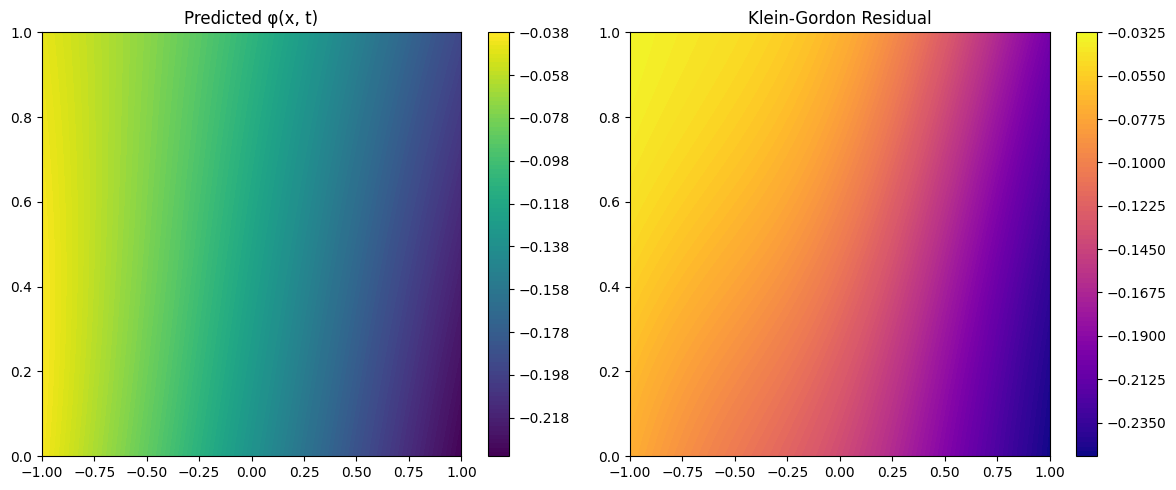

In [6]:
phi_np = phi.detach().numpy().reshape(100, 100)
residual_np = residual.detach().numpy().reshape(100, 100)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(X, T, phi_np, 100, cmap='viridis')
plt.title("Predicted φ(x, t)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(X, T, residual_np, 100, cmap='plasma')
plt.title("Klein-Gordon Residual")
plt.colorbar()

plt.tight_layout()
plt.show()

In [7]:
print("Residual Mean:", residual_np.mean())
print("Residual Std Dev:", residual_np.std())
print("Residual Max:", residual_np.max())

Residual Mean: -0.12030183
Residual Std Dev: 0.05759576
Residual Max: -0.034559134
